https://kaggle-kr.tistory.com/category/Kaggle%20%ED%8A%9C%ED%86%A0%EB%A6%AC%EC%96%BC/Sound%20%ED%8A%9C%ED%86%A0%EB%A6%AC%EC%96%BC

In [1]:
#path 관련 라이브러리
import os
from os.path import isdir, join
from pathlib import Path

# Scientific Math 라이브러리  
import numpy as np
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile

# Visualization 라이브러리
import matplotlib.pyplot as plt
import tensorflow as tf
import IPython.display as ipd
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

%matplotlib inline

In [2]:
audio_path = 'D:/일학습과제2018/파이썬/train/train/test/'

In [3]:
#filename = 'yes/00f0204f_nohash_0.wav'
filename = 'yes/yes_01.wav'
sample_rate, samples = wavfile.read(str(audio_path) + filename)
ipd.Audio(samples, rate= sample_rate)

* 푸리에 변환
* 소리데이터에서 시간대별 주파수를 분리해 스펙트로그램이라는 이미지 형태로 변경
* 이미지 처럼 보이지만 실제로는 matplotlib를 이용해 그래프를 그린 것
* http://darkpgmr.tistory.com/171

---

* 다음 함수가 소리 파일을 입력받아 주파수 대역의 범위, 시간의 범위, 그리고 각 시간대별 주파수대역의 값을 반환합니다.
* 정확하게는 scipy 라이브러리 내에 signal 함수를 사용합니다.

In [4]:
def log_specgram(audio, sample_rate, window_size=20, step_size = 10, eps = 1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio,
                                           fs = sample_rate,
                                           window='hann',
                                           nperseg = nperseg,
                                           noverlap = noverlap,
                                           detrend = False)
    return freqs, times, np.log(spec. T .astype(np.float32) + eps)

각  소리별 스펙트로그램

In [5]:
dirs = [f for f in os.listdir(audio_path) if isdir(join(audio_path, f))]
dirs.sort()
dirs

['down', 'go', 'left', 'no', 'yes']

down


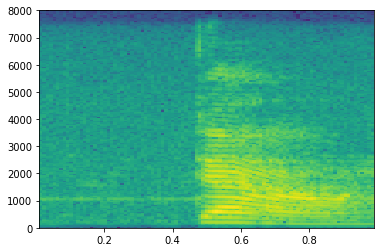

go


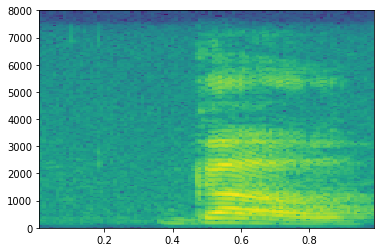

left


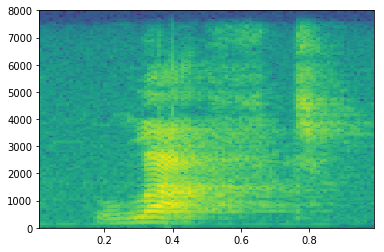

no


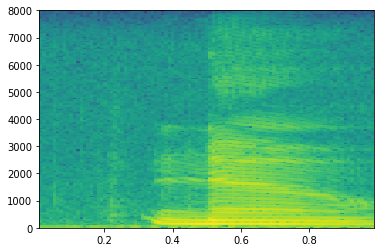

yes


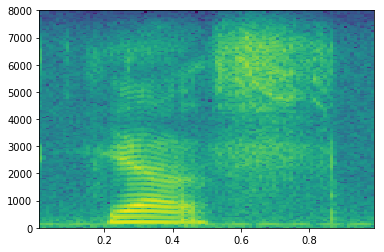

In [6]:
dirs = [f for f in os.listdir(audio_path) if isdir(join(audio_path, f))]
dirs.sort()

for direct in dirs:
    waves = [f for f in os.listdir(join(audio_path, direct)) if f.endswith('.wav')]
    sample_rate, samples = wavfile.read(join(audio_path, direct, direct + '_01.wav'))
    
    freqs, times, spec = log_specgram(samples, sample_rate)
    plt.imshow(spec. T, aspect='auto', origin='lower', extent=[times.min(), times.max(), freqs.min(), freqs.max()])
    
    print(direct)
    
    plt.show()

* 가로축이 시간축 세로축이 주파수 대역이며, 각 점에서 밝은 정도가 해당 주파수 성분의 세기라고 볼 수 있습니다.
* 스펙트로그램은 사람눈으로 보았을 때 비슷해 보이지만, 실제로 사람이 들었을 때 다르게 들립니다. 이는 총기 소리별로 각 주파수 성분의 세기가 다르기 때문입니다.
* 공통점으로는 8000Hz 이상의 주파수 대역에서는 소리 성분이 없는것으로 보여 집니다.
* 보기 쉽게 3차원으로 살펴보도록 하겠습니다.



In [7]:
filename = 'yes/yes_01.wav'
sample_rate, samples = wavfile.read(str(audio_path) + filename)
fregs, time, spec = log_specgram(samples, sample_rate)

#spectrogram 3d pic.
data = [go.Surface(x=times, y=freqs, z=spec.T)]
layout = go.Layout(
    title = 'Spectrogram of "yes" in 3d',
    scene = dict(
    yaxis = dict(title='Frequencies', range=[freqs.min(),freqs.max()]),
    xaxis = dict(title='Time', range=[times.min(),times.max()],),
    zaxis = dict(title='Log amplitude'),
    ),
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

### 2.전처리..

* 4000Hz 주파수  이상 부분은 제거. 시간도 1.5초에서 1초로 조정(Sample_rate때문에).
* 섀넌 표본화 이론? https://ko.wikipedia.org/wiki/%ED%91%9C%EB%B3%B8%ED%99%94_%EC%A0%95%EB%A6%AC Sample_rate 16000으로 지정? 소리파일 Resample?


filename = 'yes/yes_01.wav'
sample_rate, samples = wavfile.read(str(audio_path) + filename)
freqs, times, spec = log_specgram(samples, sample_rate)

Resample before

In [8]:
ipd.Audio(samples, rate= sample_rate)

Sample_rate 8000 (0 ~ 4000Hz)

In [9]:
new_sr = 8000
resampled = signal.resample(samples, new_sr)

C:\ProgramData\Anaconda3\envs\venv\lib\site-packages\scipy\signal\signaltools.py:2223: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\ProgramData\Anaconda3\envs\venv\lib\site-packages\scipy\signal\signaltools.py:2225: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\ProgramData\Anaconda3\envs\venv\lib\site-packages\scipy\signal\signaltools.py:2230: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, 

In [10]:
ipd.Audio(resampled, rate= new_sr)

* 사람이 들었을 때 그렇게 큰 변화를 느끼지 못할 수 있는 정도입니다.

* 다음은 축을 주파수 대역과 주파수의 세기로 나타낸 그래프를 그릴때 사용하는 함수

In [11]:
def custom_fft(y, fs):
    T = 1.0 / fs
    N = y.shape[0]
    yf = fft(y)
    xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
    vals = 2.0/N * np.abs(yf[0:N//2])
    return xf,vals

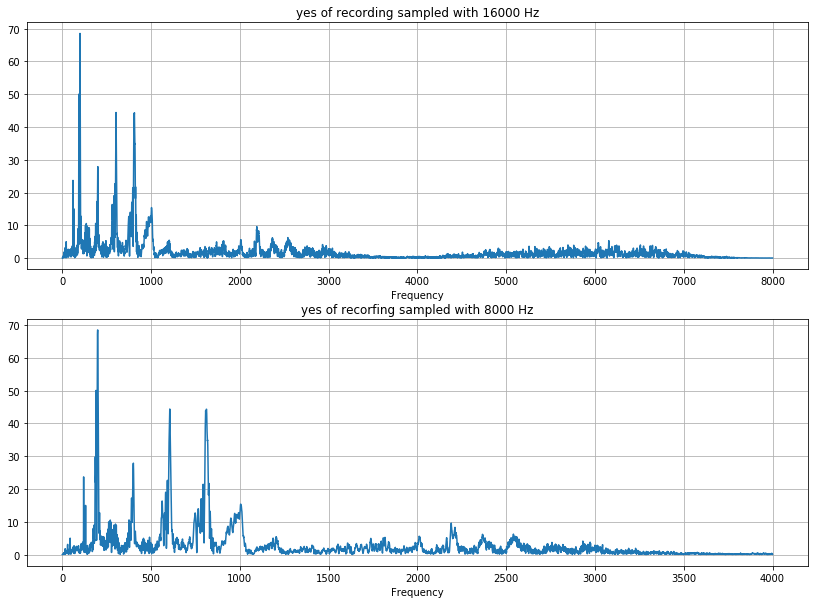

In [12]:
orgin_xf, orgin_vals = custom_fft(samples, sample_rate)
resampled_xf, resampled_vals = custom_fft(resampled, new_sr)
fig = plt.figure(figsize=(14, 10))

ax1 = fig.add_subplot(211)
ax1.set_title('yes of recording sampled with ' + str(sample_rate) + ' Hz')
ax1.plot(orgin_xf, orgin_vals)
ax1.set_xlabel('Frequency')
plt.grid()

ax2 = fig.add_subplot(212)
ax2.set_title('yes of recorfing sampled with ' + str(new_sr) + ' Hz')
ax2.plot(resampled_xf, resampled_vals)
ax2.set_xlabel('Frequency')
plt.grid()
plt.show()

### 3.데이터 준비
*  Resample된 데이터들을 분류하기 좋게 numpy 배열로 변경
* 각 폴더내에 들어있는 소리 파일을 읽어옵니다.
* 데이터를 준비하는 과정에서 min-max 정규화를 실시했는데, 이는 우리가 분류 과정에서 활성화 함수로 Relu function을 사용하기 위함입니다. 우리가 사용할 스펙트로그램에는 log를 취하다 보니 작은 값에 대해서는 음수로 된 값이 많습니다.
* Relu function은 0보다 큰 값은 그대로 통과시키고 0보다 작은 값은 0으로 통과시키는 함수이기 때문에 값을 0-1 사이 값으로 변경해주는 정규화 과정이 필요

Sample Rate : 8000
Number of labels: 5
['down', 'go', 'left', 'no', 'yes']
0:down 
after transform


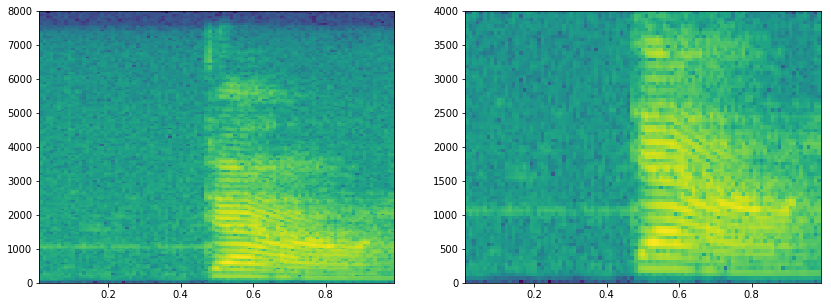

1:go 
after transform


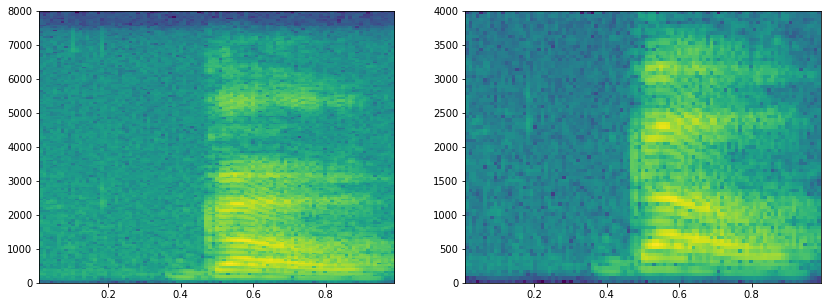

2:left 
after transform


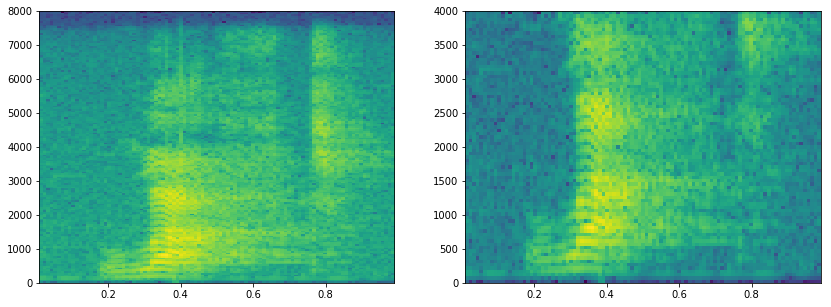

3:no 
after transform


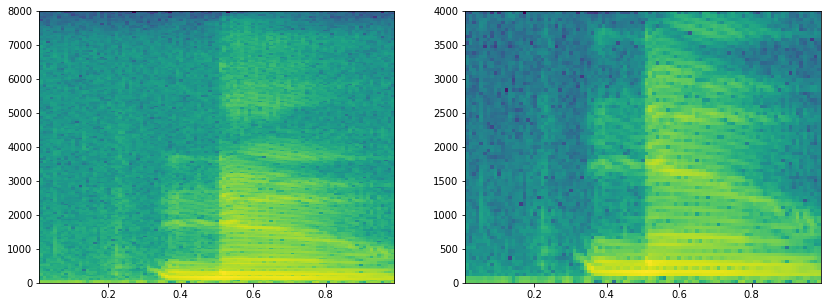

4:yes 
after transform


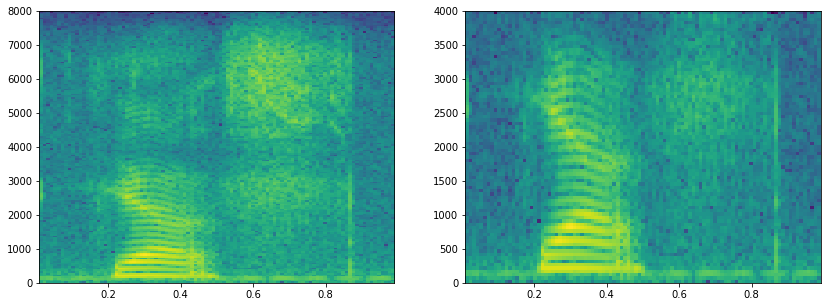

In [13]:
freqs, times, spec = log_specgram(resampled, new_sr)
freqs_size = len(freqs)
times_size = len(times)

print('Sample Rate : ' + str(new_sr))
print('Number of labels: ' + str(len(dirs)))

print(dirs)
all_data = []
spec_all = []
target_all = []
target_value = {}

for i, direct in enumerate(dirs):
    # read by each folders
    waves = [f for f in os.listdir(join(audio_path, direct)) if f.endswith('.wav')]
    target_value[direct] = i
    print(str(i)+':' + str(direct) + ' ')
    for j, wav in enumerate(waves):
        target_all.append(direct)
        #폴더 내 소리 파일을 리샘플하고 넘파이 배열에 저장
        sample_rate, samples = wavfile.read(join(audio_path, direct, wav))
        #resample
        resamples = signal.resample(samples, new_sr)
        #spectogram create
        freqs, times, spec = log_specgram(samples, sample_rate)
        #before after compare
        if j ==0:
            fig = plt.figure(figsize=(14, 5))
            ax1 = fig.add_subplot(121)
            print('after transform')
            ax1.imshow(spec.T, aspect='auto', origin='lower', extent=[times.min(), times.max(), freqs.min(), freqs.max()])
        freqs, times, spec = log_specgram(resamples, new_sr)
        if j == 0:
            ax2 = fig.add_subplot(122)
            ax2.imshow(spec.T, aspect='auto', origin='lower', extent=[times.min(), times.max(), freqs.min(), freqs.max()])
            plt.show()
            #spectrum value min max nomalization 0-1 range
            spec = (spec - spec.min())/(spec.max() - spec.min())
            all_data.append([np.reshape(spec, (freqs_size, times_size)), direct])

* 전처리오케이
* 훈련데이터와 테스트데이터?

### -다시

In [14]:
np.random.shuffle(all_data)
spec_all = np.reshape(np.delete(all_data, 1, 1),(len(all_data)))
target_all = [i for i in np.delete(all_data,0,1).tolist()]

In [15]:
#80% index
train_indices = np.random.choice(len(target_all),
                                round(len(target_all)*0.8), replace=False)
#20% index
test_indices = np.array(list(set(range(len(target_all)))
                            - set(train_indices)))
#array
spec_vals = np.array([x for x in spec_all])
target_vals = np.array([x for x in target_all])

#vals
train_spec = spec_vals[train_indices][:]
train_target = target_vals[train_indices][:]
test_spec = spec_vals[test_indices][:]
test_target = target_vals[test_indices][:]

def cnn_model(input_images, batch_size, drop_out_rate=0.1, is_traning=False, train_logical=True):
    def truncated_normal_var(name, shape, dtype):
        return(tf.get_variable(name=name, shape=shape, dtype=dtype, initializer = tf.truncated_normal_initializer(stddev=0.05)))
    
    def zero_var(name, shape, dtype):
        return(tf.get_variable(name=name, shape=shape, dtype=dtype, initializer=tf.constant_initializer(0.0)))
        
    with tf.variable_scope('conv1') as scope:
        conv1_kernel = truncated_normal_var(name='conv_kernel1',shape=[11,11,1,16], dtype= tf.float32)
        conv1 = tf.nn.conv2d(input_images, conv1_kernel, [1,3,3,1], padding='SAME')
        conv1_bias = truncated_normal_var(name='conv_bias1', shape=[16], dtype=tf.float32)
        conv1_add_bias = tf.nn.bias_add(conv1, conv1_bias)
        relu_conv1 = tf.nn.relu(conv1_add_bias)
        
    norm1= tf.nn.Irn(relu_conv1, depth_radius=5, bias=2.5, alpha=1e-3, beta=0.75, name='norm1')
    
    with tf.variable_scope('conv2') as scope:
        conv2_kernel = truncated_normal_var(name='conv_kernel2', shape=[5, 5, 16, 32], dtype=tf.float32)
        conv2 = tf.nn.conv2d(norm1, conv2_kernel, [1,1,1,1], padding='SAME')
        conv2_bias = truncated_normal_var(name='conv_bias2', shape=[32], dtype=tf.float32)
        con2_add_bias = tf.nn.bias_add(conv2, conv2_bias)
        relu_conv2 = tf.nn.relu(conv2_add_bias)
        
    norm2 = tf.nn.Irn(relu_conv2, depth_radius=5, bias=2.0, alpha=1e-3, beta=0.75, name='norm2')
    
    with tf.variable_scope('conv3') as scope:
        conv3_kernel = truncated_normal_var(name='conv_kernel3', shape=[3, 3, 32, 64], dtype=tf.float32)
        conv3 = tf.nn.conv2d(norm2, conv3_kernel, [1, 1, 1, 1], padding='SAME')
        conv3_bias = truncated_normal_var(name='conv_bias3', shape=[64], dtype=tf.float32)
        conv3_add_bias = tf.nn.bias_add(conv3, conv3_bias)
        relu_conv3 = tf.nn.relu(conv3_add_bias)
        
    pool = tf.nn.max_pool(relu_conv3, ksize=[1, 3, 3, 1], strides=[1, 2, 2, 1], padding='SAME', name='pool_layer')
    norm3 = tf.nn.Irn(pool, depth_radius=5, bias=2.0, alpha=1e-3, beta=0.75, name='norm3')
    reshaped_output = tf.reshape(norm3, [batch_size, -1])
    reshaped_dim = reshaped_output.get_shape()[1].value
    
    with tf.variable_scope('full1') as scope:
        full_weight1 = truncated_normal_var(name='full_mult1', shape=[reshaped_dim, 384], dtype=tf.float32)
        full_bias1 = truncated_normal_var(name='full_bias1', shape[384], dtype=tf.float32)
        full_layer1 = tf.nn.relu(tf.add(tf.matmul(reshaped_output, full_weight1), full_bias1))

    with tf.variable_scope('full2') as scope:
        full_weight2 = truncated_normal_var(name='full_mull2', shape=[reshaped_dim, 384, 192], dtype=tf.float32)
        full_bias2 = truncated_normal_var(name='full_bias2', shape[192], dtype=tf.float32)
        full_layer2 = tf.nn.relu(tf.add(tf.matmul(full_layer1, full_weight2), full_bias2))

    with tf.variable_scope('full3') as scope:
        full_weight3 = truncated_normal_var(name='full_mull3', shape=[192, len(target_value)], dtype=tf.float32)
        full_bias3 = truncated_normal_var(name='full_bias3', shape[len(target_value)], dtype=tf.float32)
        final_output = tf.nn.relu(tf.add(tf.matmul(full_layer2, full_weight3), full_bias3))
        #dropout after?
        final_output = tf,layers.dropout(final_output, rate=drop_out_rate, training=is_training)
        
    return final_output
   
        
    

In [17]:
def cnn_model(input_images, batch_size,drop_out_rate=0.1, is_training=False, train_logical=True):
    def truncated_normal_var(name, shape, dtype):
        return(tf.get_variable(name=name, shape=shape, dtype=dtype, initializer = tf.truncated_normal_initializer(stddev=0.05)))

    def zero_var(name, shape, dtype):
        return(tf.get_variable(name=name, shape=shape, dtype=dtype, initializer=tf.constant_initializer(0.0)))
    
    with tf.variable_scope('conv1') as scope:
        conv1_kernel = truncated_normal_var(name='conv_kernel1',shape=[11,11,1,16],
                                           dtype= tf.float32)
        conv1 = tf.nn.conv2d(input_images, conv1_kernel, [1,3,3,1], padding='SAME')
        conv1_bias = truncated_normal_var(name='conv_bias1', shape=[16], dtype=tf.float32)
        conv1_add_bias = tf.nn.bias_add(conv1,conv1_bias)
        relu_conv1 = tf.nn.relu(conv1_add_bias)
    
    norm1= tf.nn.lrn(relu_conv1,depth_radius=5, bias=2.5,alpha=1e-3, beta=0.75, name='norm1')
    
    with tf.variable_scope('conv2') as scope:
        conv2_kernel = truncated_normal_var(name='conv_kernel2', shape=[5, 5, 16, 32], dtype=tf.float32)
        conv2 = tf.nn.conv2d(norm1, conv2_kernel, [1, 1, 1, 1], padding='SAME')
        conv2_bias = truncated_normal_var(name='conv_bias2', shape=[32], dtype=tf.float32)
        conv2_add_bias = tf.nn.bias_add(conv2, conv2_bias)
        relu_conv2 = tf.nn.relu(conv2_add_bias)

    norm2 = tf.nn.lrn(relu_conv2, depth_radius=5, bias=2.0, alpha=1e-3, beta=0.75, name='norm2')
    
    with tf.variable_scope('conv3') as scope:
        conv3_kernel = truncated_normal_var(name='conv_kernel3', shape=[3, 3, 32, 64], dtype=tf.float32)
        conv3 = tf.nn.conv2d(norm2, conv3_kernel, [1, 1, 1, 1], padding='SAME')
        conv3_bias = truncated_normal_var(name='conv_bias3', shape=[64], dtype=tf.float32)
        conv3_add_bias = tf.nn.bias_add(conv3, conv3_bias)
        relu_conv3 = tf.nn.relu(conv3_add_bias)

    pool = tf.nn.max_pool(relu_conv3, ksize=[1, 3, 3, 1], strides=[1, 2, 2, 1], padding='SAME', name='pool_layer')
    norm3 = tf.nn.lrn(pool, depth_radius=5, bias=2.0, alpha=1e-3, beta=0.75, name='norm3')
    reshaped_output = tf.reshape(norm3, [batch_size, -1])
    reshaped_dim = reshaped_output.get_shape()[1].value
    
    with tf.variable_scope('full1') as scope:
        full_weight1 = truncated_normal_var(name='full_mult1', shape=[reshaped_dim, 384], dtype=tf.float32)
        full_bias1 = truncated_normal_var(name='full_bias1', shape=[384], dtype=tf.float32)
        full_layer1 = tf.nn.relu(tf.add(tf.matmul(reshaped_output, full_weight1), full_bias1))

    with tf.variable_scope('full2') as scope:
        full_weight2 = truncated_normal_var(name='full_mull2', shape=[384, 192], dtype=tf.float32)
        full_bias2 = truncated_normal_var(name='full_bias2', shape=[192], dtype=tf.float32)
        full_layer2 = tf.nn.relu(tf.add(tf.matmul(full_layer1, full_weight2), full_bias2))

    with tf.variable_scope('full3') as scope:
        full_weight3 = truncated_normal_var(name='full_mull3', shape=[192, len(target_value)], dtype=tf.float32)
        full_bias3 = truncated_normal_var(name='full_bias3', shape=[len(target_value)], dtype=tf.float32)
        final_output = tf.nn.relu(tf.add(tf.matmul(full_layer2, full_weight3), full_bias3))
    final_output = tf.layers.dropout(final_output, rate=drop_out_rate, training=is_training)
    
    return final_output

In [18]:
# Parameters
lr = 0.001
generations = 5000
num_gens_to_wait = 250
drop_out_rate = 0.05
batch_size = 32

In [19]:
# 레이블을 네트워크가 이해할 수 있는 숫자형태로 변경
temp = []
for v in train_target:
    temp.append(target_value[v[0]])
train_target = np.array(temp)

temp = []
for v in test_target:
    temp.append(target_value[v[0]])
test_target = np.array(temp)

In [20]:
#네트워크에 사용할 placeholder 정의
x_input_shape = (batch_size, freqs_size,times_size,1)
y_input_shape = (batch_size, )
x_input = tf.placeholder(tf.float32, shape=x_input_shape)
y_target = tf.placeholder(tf.int32, shape=y_input_shape)
eval_input_shape = (batch_size, freqs_size, times_size,1)
eval_input = tf.placeholder(tf.float32, shape=eval_input_shape)
eval_target = tf.placeholder(tf.int32, shape=y_input_shape)

In [21]:
config = tf.ConfigProto()
sess = tf.Session(config=config)
with tf.variable_scope('scope',reuse=tf.AUTO_REUSE) as scope:
    model_output = cnn_model(x_input,batch_size,drop_out_rate=drop_out_rate, is_training=True)
    test_model_output = cnn_model(eval_input,batch_size)

In [22]:
targets = tf.squeeze(tf.cast(y_target,tf.int32))

loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=model_output, labels=y_target))
prediction = tf.nn.softmax(model_output)
test_prediction = tf.nn.softmax(test_model_output)

my_optimizer = tf.train.AdamOptimizer(learning_rate=lr, epsilon=10e-2)

train_step = my_optimizer.minimize(loss)

init = tf.global_variables_initializer()
sess.run(init)

In [23]:
# Define def to calculate accuracy
def get_accuracy(logits, targets):
    batch_predictions = np.argmax(logits, axis=1)
    num_correct = np.sum(np.equal(batch_predictions, targets))
    return (100. * num_correct)/ batch_predictions.shape[0]

In [24]:
print('Train_Spectrogram Demension : ' + str(np.shape(train_spec)))

Train_Spectrogram Demension : (4, 81, 99)


In [25]:
print('Train_Label Demension : ' + str(np.shape(train_target)))

Train_Label Demension : (4,)


In [26]:
print('Test_Spectrogram Demension : ' + str(np.shape(test_spec)))

Test_Spectrogram Demension : (1, 81, 99)


In [27]:
print('Test_Label Demension : ' + str(np.shape(test_target)))

Test_Label Demension : (1,)


In [28]:
print('Number Of Labels : ' + str(len(target_value)))

Number Of Labels : 5


In [ ]:
train_loss = []
train_acc = []
test_acc = []
for i in range(generations):
    rand_index = np.random.choice(len(train_spec),size = batch_size)
    rand_x = train_spec[rand_index]
    rand_x = np.expand_dims(rand_x, -1)
    rand_y = train_target[rand_index]

    sess.run(train_step,feed_dict = {x_input: rand_x, y_target: rand_y})
    temp_train_loss, temp_train_preds = sess.run([loss, prediction], feed_dict={x_input: rand_x, y_target: rand_y})
    temp_train_acc = get_accuracy(temp_train_preds, rand_y)
    
    # logging temp result
    if (i + 1) % 50 == 0:
        eval_index = np.random.choice(len(test_spec), size=batch_size)
        eval_x = test_spec[eval_index]
        eval_x = np.expand_dims(eval_x, -1)
        eval_y = test_target[eval_index]

        test_preds = sess.run(test_prediction, feed_dict={eval_input: eval_x})
        temp_test_acc = get_accuracy(test_preds, eval_y)

        # Logging and Printing Results
        train_loss.append(temp_train_loss)
        train_acc.append(temp_train_acc)
        test_acc.append(temp_test_acc)
        acc_and_loss = [(i + 1), temp_train_loss, temp_train_acc,
                            temp_test_acc]
        acc_and_loss = [np.round(x, 10) for x in acc_and_loss]
        print('Generation # {}. Train Loss: {:.10f}. Train Acc (Test Acc): {:.2f} ({:.2f})'.format(*acc_and_loss))

Generation # 50. Train Loss: 1.6118803024. Train Acc (Test Acc): 0.00 (100.00)
Generation # 100. Train Loss: 1.5943074226. Train Acc (Test Acc): 25.00 (0.00)
Generation # 150. Train Loss: 1.5818400383. Train Acc (Test Acc): 34.38 (0.00)
Generation # 200. Train Loss: 1.5745805502. Train Acc (Test Acc): 31.25 (0.00)
Generation # 250. Train Loss: 1.5600450039. Train Acc (Test Acc): 28.12 (0.00)
Generation # 300. Train Loss: 1.5554010868. Train Acc (Test Acc): 18.75 (0.00)
Generation # 350. Train Loss: 1.5165187120. Train Acc (Test Acc): 81.25 (0.00)
Generation # 400. Train Loss: 1.4825478792. Train Acc (Test Acc): 53.12 (0.00)
Generation # 450. Train Loss: 1.4636423588. Train Acc (Test Acc): 28.12 (0.00)
Generation # 500. Train Loss: 1.3682969809. Train Acc (Test Acc): 43.75 (0.00)
Generation # 550. Train Loss: 1.2184586525. Train Acc (Test Acc): 68.75 (0.00)
Generation # 600. Train Loss: 1.1777403355. Train Acc (Test Acc): 84.38 (0.00)
Generation # 650. Train Loss: 0.5304853916. Train Ac